# Algorithm of text to image generation

* Algorithm - [ Stable Diffusion with 🧨 Diffusers](https://huggingface.co/blog/stable_diffusion#stable-diffusion-with-%F0%9F%A7%A8-diffusers)
  * Stable Diffusion is a text-to-image latent diffusion model created by the researchers and engineers from CompVis, Stability AI and LAION. 
  * Stable Diffusion is based on a particular type of diffusion model called Latent Diffusion
  * [ High-Resolution Image Synthesis with Latent Diffusion Models](https://arxiv.org/abs/2112.10752)
    - By decomposing the image formation process into a sequential application of denoising autoencoders, diffusion models (DMs) achieve state-of-the-art synthesis results on image data and beyond. Additionally, their formulation allows for a guiding mechanism to control the image generation process without retraining.
    - Our latent diffusion models (LDMs) achieve a new state of the art for image inpainting and highly competitive performance on various tasks, including unconditional image generation, semantic scene synthesis, and super-resolution, while significantly reducing computational requirements compared to pixel-based DMs
  * Training database - It is trained on 512x512 images from a subset of the [LAION-5B](https://laion.ai/blog/laion-5b/) database. LAION-5B is the largest, freely accessible multi-modal dataset that currently exists.
    - LAION-5B: A NEW ERA OF OPEN LARGE-SCALE MULTI-MODAL DATASETS, by: Romain Beaumont, 31 Mar, 2022
    - a dataset of 5,85 billion CLIP-filtered image-text pairs, 14x bigger than LAION-400M, previously the biggest openly accessible image-text dataset in the world - see also our NeurIPS2022 paper

In [7]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch
from PIL import Image
import IPython.display as display

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


model_id = "CompVis/stable-diffusion-v1-4"

num_images = 6
prompt = ["a photograph of an astronaut riding a horse"] * num_images

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float32)

images = pipe(prompt).images

grid = image_grid(images, rows=2, cols=3)


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

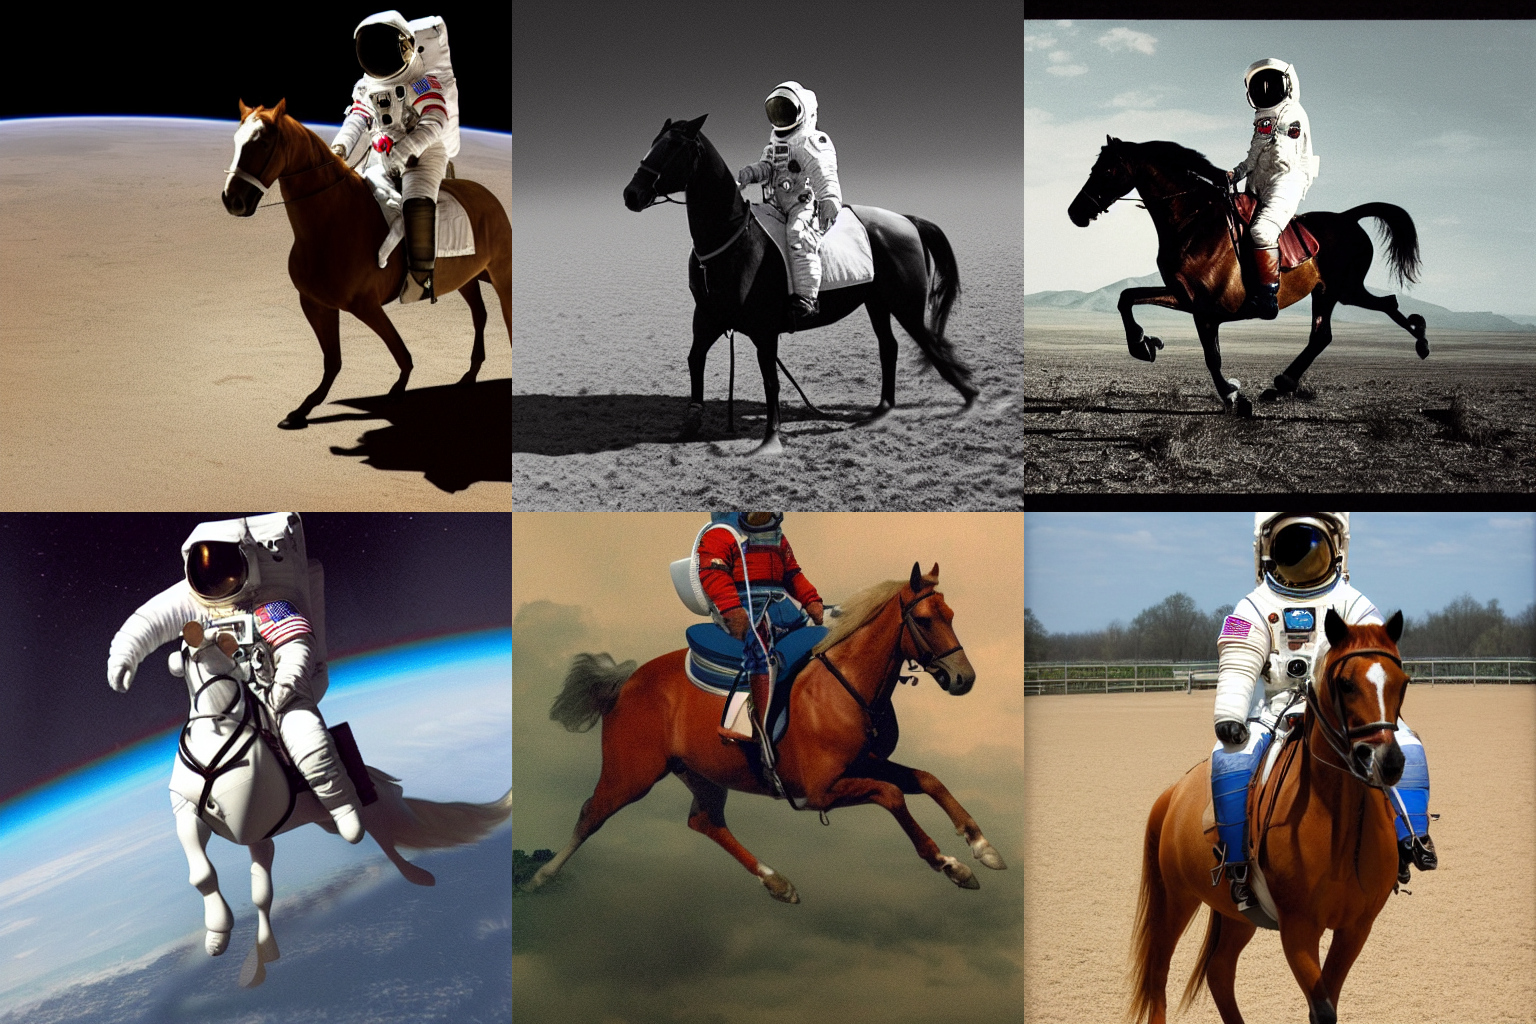

In [8]:
grid